<h1>Task 1: Load the Dataset</h1>

In [2]:
import seaborn as sns
import pandas as pd
# Load Titanic dataset from Kaggle CSV
titanic = pd.read_csv("data/train.csv")

# Display first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1>Task 2: Handle Missing Values</h1>

In [3]:
# Check how many missing values in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(titanic)   # 50% of dataset length
titanic = titanic.dropna(thresh=threshold, axis=1)

print(" Columns after dropping too many missing values:")
print(titanic.columns)


 Columns after dropping too many missing values:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


Here Cabin gets dropped because it has too many missing values.

In [7]:
# Fill categorical columns with mode (most frequent value)
# Fill numeric columns with median
num_cols = titanic.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    titanic[col] = titanic[col].fillna(titanic[col].median())

# Fill categorical columns with mode
cat_cols = titanic.select_dtypes(include=['object']).columns

for col in cat_cols:
    titanic[col] = titanic[col].fillna(titanic[col].mode()[0])
print(" Missing values after cleaning:\n", titanic.isnull().sum())


 Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<h1>Task 3: Handle Duplicate Data</h1>

In [8]:
# Count duplicate rows
duplicates = titanic.duplicated().sum()
print(f" Number of duplicate rows found: {duplicates}")
# Remove duplicates (if any)
titanic = titanic.drop_duplicates()

print(f" After removal, dataset shape: {titanic.shape}")

 Number of duplicate rows found: 0
 After removal, dataset shape: (891, 11)


<h1>Task 4: Convert Categorical Features to Numeric</h1>

In [9]:
# Identify categorical columns
cat_cols = titanic.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())


Categorical columns: ['Name', 'Sex', 'Ticket', 'Embarked']


In [10]:
# Drop columns not useful for modeling (optional step)
titanic = titanic.drop(columns=['Name', 'Ticket'])

# One-hot encoding for categorical columns (Sex, Embarked)
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

print("Categorical columns converted to numeric")
titanic.head()


Categorical columns converted to numeric


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [11]:
# Example if there were boolean columns
bool_cols = titanic.select_dtypes(include=['bool']).columns
for col in bool_cols:
    titanic[col] = titanic[col].astype(int)
print(" Boolean columns converted to numeric")

 Boolean columns converted to numeric


<h1>Task 5: Feature Scaling</h1>

In [13]:
# Select only numeric columns
num_cols = titanic.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", num_cols.tolist())
from sklearn.preprocessing import MinMaxScaler

# Copy dataset
titanic_minmax = titanic.copy()

scaler_minmax = MinMaxScaler()

# Apply Min-Max Scaling to Age and Fare
titanic_minmax[['Age', 'Fare']] = scaler_minmax.fit_transform(titanic[['Age', 'Fare']])

print("Min-Max Scaling applied")
titanic_minmax[['Age', 'Fare']].head()


Numeric columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
Min-Max Scaling applied


,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [15]:
from sklearn.preprocessing import StandardScaler

# Copy dataset
titanic_standard = titanic.copy()

scaler_standard = StandardScaler()

# Apply Standard Scaling to Age and Fare
titanic_standard[['Age', 'Fare']] = scaler_standard.fit_transform(titanic[['Age', 'Fare']])

print(" Standardization applied")
titanic_standard[['Age', 'Fare']].head()


 Standardization applied


,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


In [16]:
print("Original Age/Fare stats:\n", titanic[['Age','Fare']].describe(), "\n")
print("Min-Max Scaled Age/Fare stats:\n", titanic_minmax[['Age','Fare']].describe(), "\n")
print("Standardized Age/Fare stats:\n", titanic_standard[['Age','Fare']].describe())


Original Age/Fare stats:
               Age        Fare
count  891.000000  891.000000
mean    29.361582   32.204208
std     13.019697   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200 

Min-Max Scaled Age/Fare stats:
               Age        Fare
count  891.000000  891.000000
mean     0.363679    0.062858
std      0.163605    0.096995
min      0.000000    0.000000
25%      0.271174    0.015440
50%      0.346569    0.028213
75%      0.434531    0.060508
max      1.000000    1.000000 

Standardized Age/Fare stats:
                 Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00


<h1>Task 6: Outlier Detection using IQR Method</h1>

In [17]:
import pandas as pd

# Step 1: Select numerical columns
numeric_cols = titanic.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Detect outliers using IQR method
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)  # 25th percentile
        Q3 = df_clean[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                      # Interquartile Range
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Print how many outliers in this column
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        print(f"{col}: {outliers.shape[0]} outliers")

        # Option 1: Remove outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

        # Option 2 (alternative): Replace with median (uncomment if needed)
        # median = df_clean[col].median()
        # df_clean[col] = np.where((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound),
        #                          median, df_clean[col])
    return df_clean

# Step 3: Apply function
titanic_no_outliers = remove_outliers_iqr(titanic, numeric_cols)

print("Shape before:", titanic.shape)
print("Shape after :", titanic_no_outliers.shape)


PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 39 outliers
Parch: 144 outliers
Fare: 81 outliers
Sex_male: 139 outliers
Embarked_Q: 32 outliers
Embarked_S: 56 outliers
Shape before: (891, 10)
Shape after : (334, 10)


<h1>Data Visualization Tasks</h1>
<h2>Task 7: Exploratory Data Visualization</h2>

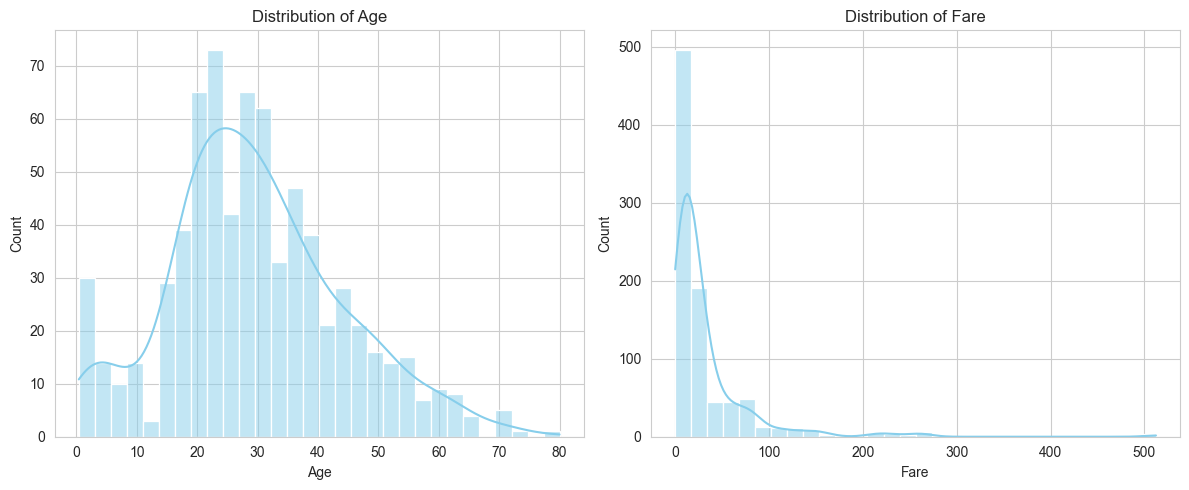

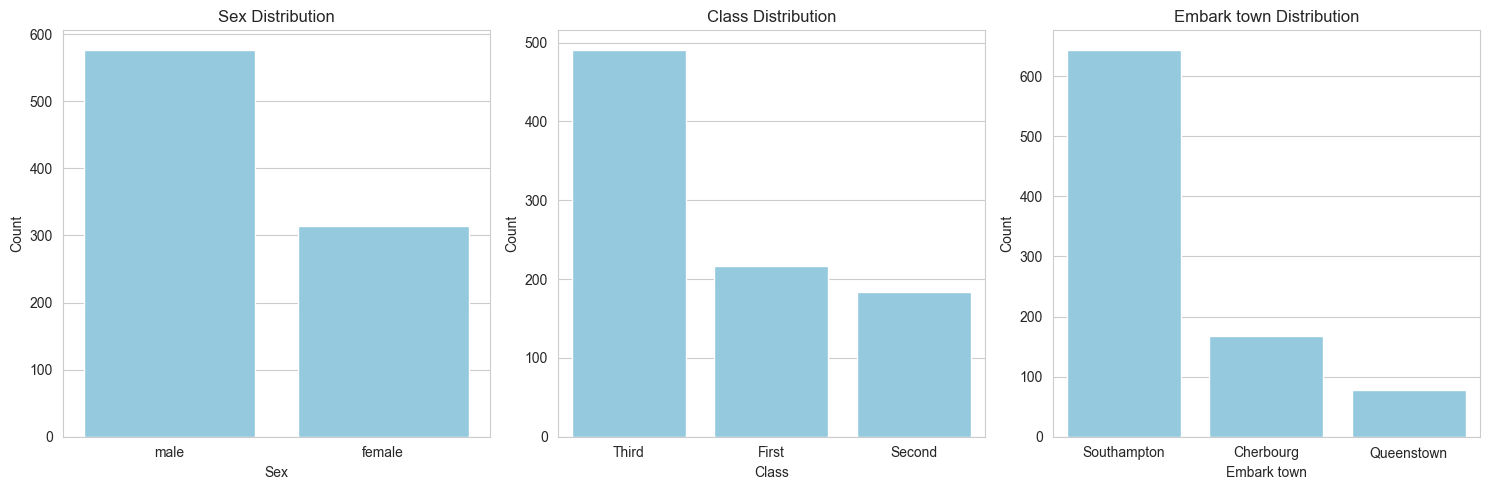

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Set plot style
sns.set_style("whitegrid")

# ---------- 1️⃣ Histograms for numerical features ----------
numerical_features = ["age", "fare"]

plt.figure(figsize=(12, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.histplot(titanic[feature], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ---------- 2️⃣ Bar plots for categorical features ----------
categorical_features = ["sex", "class", "embark_town"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(
        x=feature, 
        data=titanic, 
        color="skyblue",  
        order=titanic[feature].value_counts().index
    )
    plt.title(f"{feature.replace('_', ' ').capitalize()} Distribution")
    plt.xlabel(feature.replace('_', ' ').capitalize())
    plt.ylabel("Count")
plt.tight_layout()
plt.show()



There are 3 embarkation ports:
C = Cherbourg (France)
Q = Queenstown (Ireland)
S = Southampton (England)

<h1>Task 8: Survival Analysis Visualization</h1>

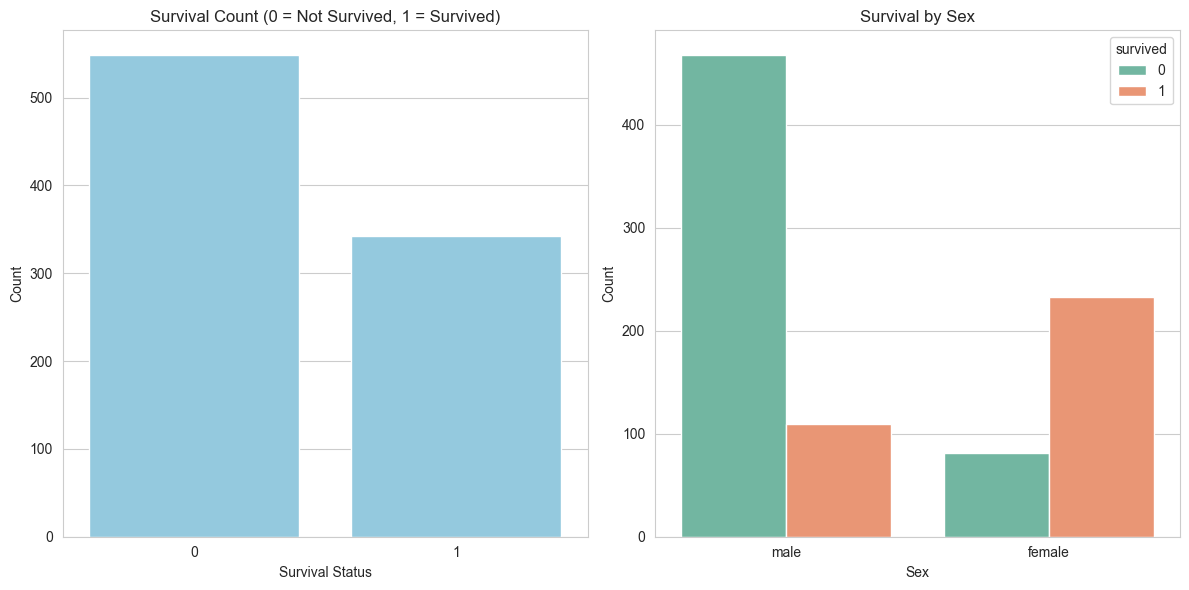

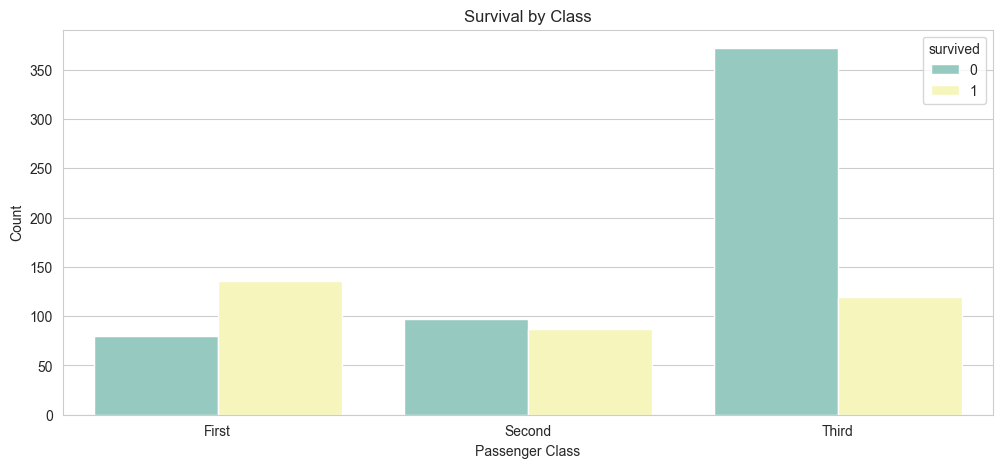

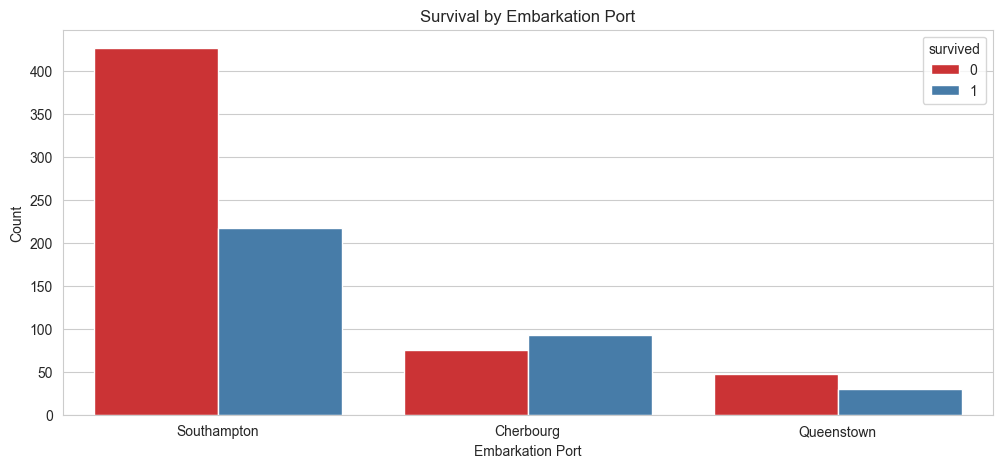

In [ ]:
# Task 8: Survival Analysis Visualization
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x="survived", data=titanic, color="skyblue")
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.xlabel("Survival Status")
plt.ylabel("Count")

# 2. Grouped bar plots 
plt.subplot(1, 2, 2)
sns.countplot(x="sex", hue="survived", data=titanic, palette="Set2")
plt.title("Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Grouped bar plot by Class
plt.figure(figsize=(12, 5))
sns.countplot(x="class", hue="survived", data=titanic, palette="Set3")
plt.title("Survival by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# Grouped bar plot by Embark_town
plt.figure(figsize=(12, 5))
embark_col = "embark_town" if "embark_town" in titanic.columns else "embarked"
sns.countplot(x=embark_col, hue="survived", data=titanic, palette="Set1")
plt.title("Survival by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Count")
plt.show()


<h1>Task 9: Correlation and Heatmap</h1>


Correlation Matrix:
            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000 

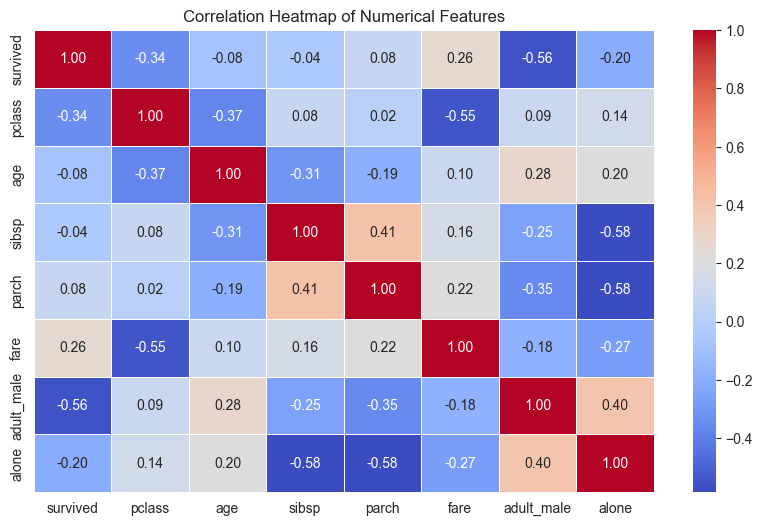

In [23]:
# Task 9: Correlation and Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation matrix (only numerical features)
corr_matrix = titanic.corr(numeric_only=True)

print("Correlation Matrix:")
print(corr_matrix)

# 2. Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


<h1>Task 10: Boxplots and Outlier Visualization</h1>

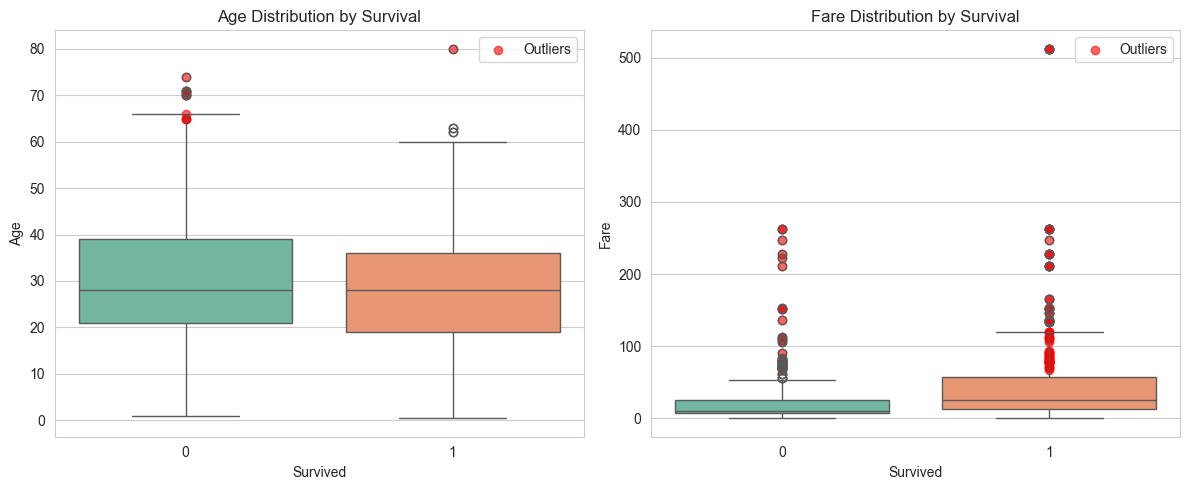

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Recalculate IQR outliers for Age and Fare ---
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

age_outliers = find_outliers_iqr(titanic, "age")
fare_outliers = find_outliers_iqr(titanic, "fare")

# --- Step 2: Boxplot for Age grouped by Survival ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="survived", y="age", hue="survived", data=titanic, 
            palette="Set2", legend=False)  # ✅ Fixed
plt.scatter(age_outliers["survived"], age_outliers["age"], 
            color="red", label="Outliers", alpha=0.6)
plt.title("Age Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.legend()

# --- Step 3: Boxplot for Fare grouped by Survival ---
plt.subplot(1, 2, 2)
sns.boxplot(x="survived", y="fare", hue="survived", data=titanic, 
            palette="Set2", legend=False)  # ✅ Fixed
plt.scatter(fare_outliers["survived"], fare_outliers["fare"], 
            color="red", label="Outliers", alpha=0.6)
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.legend()

plt.tight_layout()
plt.show()


Task 11: Pair Plot

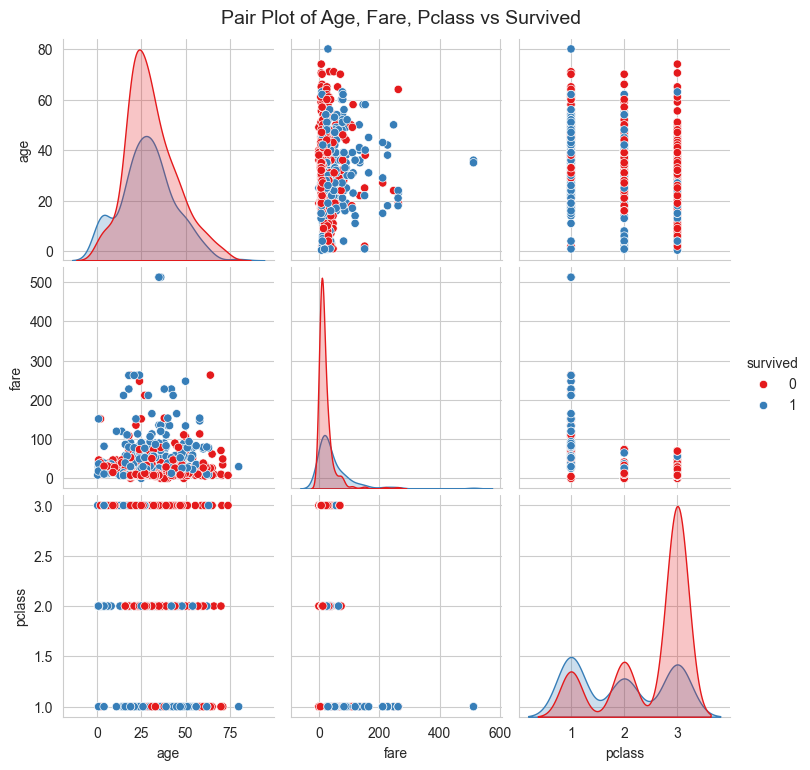

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features
features = ["age", "fare", "pclass", "survived"]

# Pair plot
sns.pairplot(titanic[features], hue="survived", diag_kind="kde", palette="Set1")
plt.suptitle("Pair Plot of Age, Fare, Pclass vs Survived", y=1.02, fontsize=14)
plt.show()


In [ ]:
titanic.to_csv("titanic_cleaned.csv", index=False)

print("Cleaned dataset saved as 'titanic_cleaned.csv'")

✅ Cleaned dataset saved as 'titanic_cleaned.csv'
